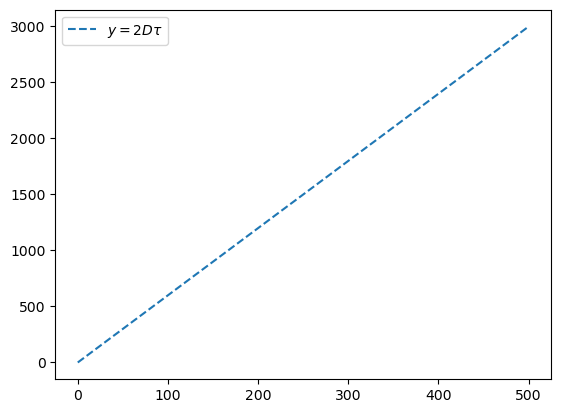

In [13]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import numpy as np

universe = mda.Universe('../Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj', '../Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
selection_type_1 = universe.select_atoms('type 1')
    
MSD = msd.EinsteinMSD(selection_type_1, delta=1, start=0, stop=None)
MSD.run()
msd =  MSD.results.timeseries
    
nframes = MSD.n_frames
timestep = 1 # this needs to be the actual time between frames
lagtimes = np.arange(nframes)*timestep # make the lag-time axis
fig = plt.figure()
ax = plt.axes()
exact = lagtimes*6
# plot the exact result
ax.plot(lagtimes, exact, ls="--", label=r'$y=2 D\tau$')

plt.legend()
plt.show()


